# Final Project

This final project is looking at health data provided about women's health outcomes throughout the world by combining and visualizing these statistics to see a comparison in quality of life.

### 1. Life Expectancy at Birth and Age 60 Data

This set of code compares the life expectancy outcomes for women in the main World Health Organization (WHO) regions in two age ranges, at birth and at age 60. The code organizes the data as provided and concludes with a visualization of the data in a histogram format. In this phase, there is also a lot of exploration done to understand the length, quantity, and quality of the data in the file. This section also uses a local CSV file as the data source.

In [1]:
import pandas as pd
import os
notebook_path = os.path.abspath("final.ipynb")
WHO = os.path.join(os.path.dirname(notebook_path), "xmart.csv")
life_exp = pd.read_csv(WHO)
print(life_exp)
rows = life_exp.shape[0]
columns = len(life_exp.columns)

               Unnamed: 0 Unnamed: 1 Life expectancy at birth (years)  \
0              WHO region       Year                           Female   
1                  Global       2019                             75.9   
2                  Global       2015                             74.9   
3                  Global       2010                             73.2   
4                  Global       2000                             69.3   
5                  Africa       2019                             66.6   
6                  Africa       2015                             64.7   
7                  Africa       2010                             61.3   
8                  Africa       2000                             54.3   
9                Americas       2019                             79.8   
10               Americas       2015                             79.5   
11               Americas       2010                             78.4   
12               Americas       2000               

Note 1a: There are 29 total rows of data and a total of 4 columns in the dataset.

In [2]:
len(life_exp)-1

28

Note 1b: Since the data is presented with multiple columns of data based on both WHO region and year. As a result, there are multiple unique sets of data for life expectancy of women. The two sets of data given for these categories are for "at birth" and "at age 60". The header column doesn't have any data, so we must subtract that from the length of the data, giving us the total amount of unique data points of 28.

In [3]:
birth = life_exp['Life expectancy at birth (years)'].unique()
age_60 = life_exp['Life expectancy at age 60 (years)'].unique()
len(birth)
len(age_60)

27

Note 1c: The amount of unique data entries is one number less than the amount of total unique rows of data. Therefore, this means 1 row of information in this dataset may have redundancies.

               Unnamed: 0 Unnamed: 1 Life expectancy at birth (years)  \
1                  Global       2019                             75.9   
2                  Global       2015                             74.9   
3                  Global       2010                             73.2   
4                  Global       2000                             69.3   
5                  Africa       2019                             66.6   
6                  Africa       2015                             64.7   
7                  Africa       2010                             61.3   
8                  Africa       2000                             54.3   
9                Americas       2019                             79.8   
10               Americas       2015                             79.5   
11               Americas       2010                             78.4   
12               Americas       2000                             77.1   
13        South-East Asia       2019               

Text(0, 0.5, 'Frequency')

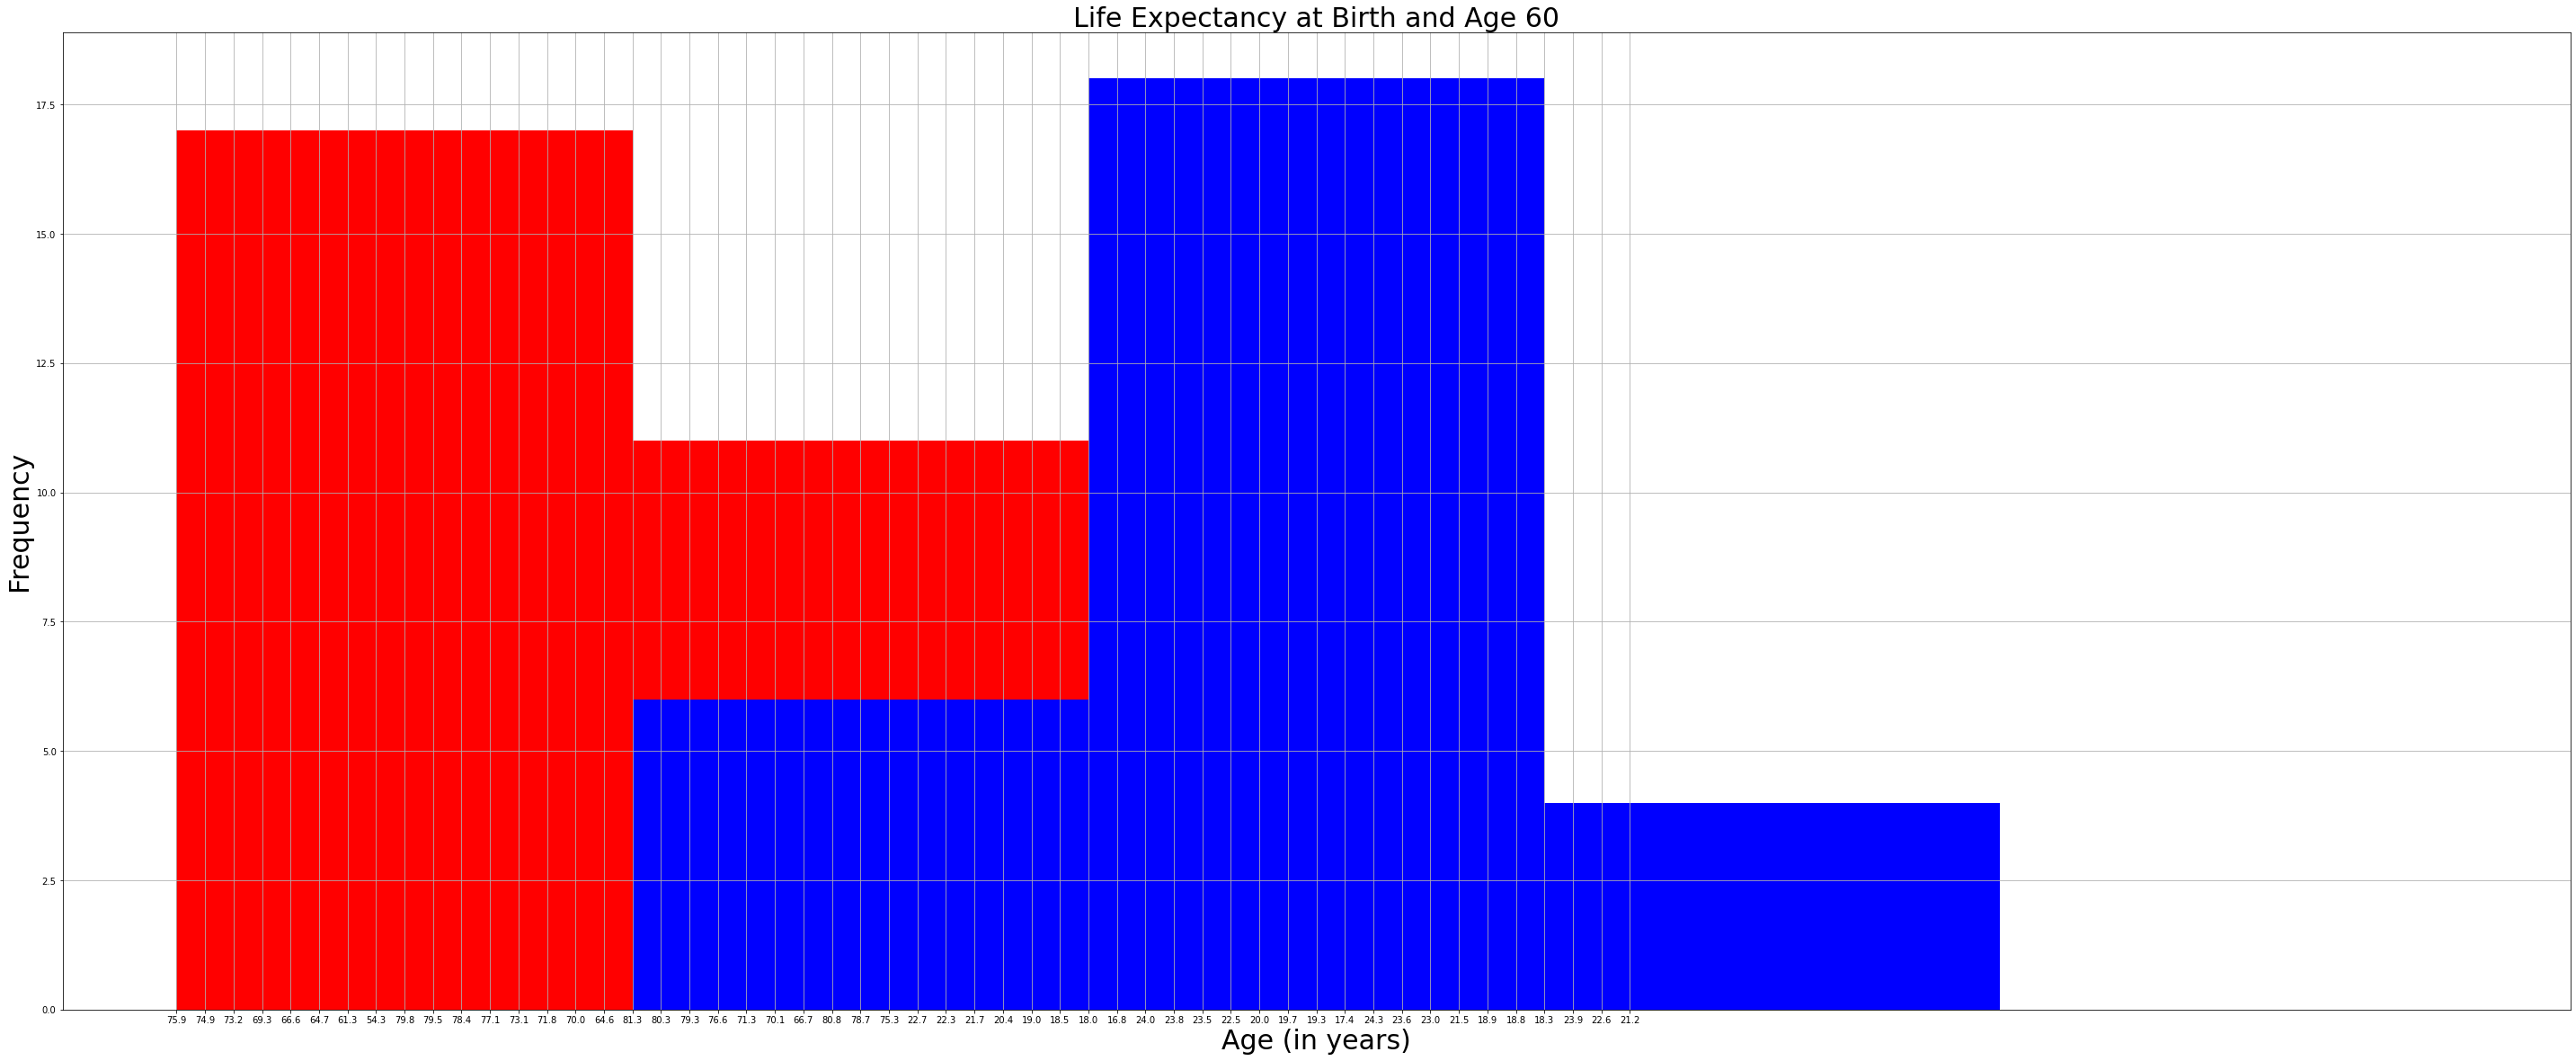

In [6]:
import matplotlib.pyplot as plt
life_exp2 = pd.read_csv(WHO)
life_exp2 = life_exp2.drop(life_exp.index[0:1])
print(life_exp2)
birth = life_exp2['Life expectancy at birth (years)'].hist(bins=5, range=[0,80], color='red')
age_60 = life_exp2['Life expectancy at age 60 (years)'].hist(bins=5, range=[0,80], color='blue')
print(birth)
print(age_60)
birth.figure.set_figheight(20)
age_60.figure.set_figwidth(50)
plt.title('Life Expectancy at Birth and Age 60', fontsize = 30)
plt.xlabel('Age (in years)', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)

Note 1d: These histogram displays the prevalence of each life expectancy for different regions across the world in varying years. There are two histograms, one for the projection for women at birth (in red) and one at age 60 (in blue).

In [ ]:
import matplotlib.pyplot as plt
grouped = life_exp2.groupby('Unnamed: 0')
print(grouped['Life expectancy at birth (years)'])
life = {}
life_60 = []
for key, item in grouped:
    #print(grouped.get_group(key)['Life expectancy at birth (years)'].astype(float).mean())
    life[key] = grouped.get_group(key)['Life expectancy at birth (years)'].astype(float).mean()
    life_60.append(grouped.get_group(key)['Life expectancy at age 60 (years)'].astype(float).mean())
names = list(life.keys())
values = list(life.values())
plt.bar(range(len(life)),values,tick_label=names)
plt.bar(range(len(life)),life_60,tick_label=names)
plt.xticks(rotation = 75)
plt.title('Life Expectancy at Birth (Blue) and Age 60 (Orange)')
plt.xlabel('WHO Region')
plt.ylabel('Age (in years)')

Note 1e: The additional exploration I took the mean of the life expectancy over the years, grouped by WHO regions. I then coupled the data for life expectancy at birth (blue) with the life expectancy at age 60 (orange). Thus, we are able to see the mean life expectancy for women across the different regions, taken at both birth and age 60. Overall, the regions with higher life expectancies include countries in the Western Pacific, European, and American WHO regions, wich African countries having the lowest life expectancy rates both at birth and at age 60.

In [ ]:
print(life)
print(life_60)
i = 0
life_exp_joined = {}
for key,value in life.items():
    life_exp_joined[key] = [key, value, life_60[i]]
    i += 1
print(life_exp_joined)
df_life_exp = pd.DataFrame.from_dict(life_exp_joined, orient='index', columns=['WHO Region', 'Life Expectancy at Birth','Life Expectancy at Age 60'])
df_life_exp

Note 1f: This last code chunk is preparing this CSV file to be concatenated at the final step of this project. All data sources that have been found can be combined through their WHO Region classification. Thus, now all the mean CSV data (over the years of 2000-2019) about womens' Life Expectancy Rates at both birth and age 60 are together in one dataframe.

### 2. Maternal Mortality Rates Data

This set of code compares the maternal mortality rate among the main World Health Organization (WHO) regions across the years 2000 to 2017. The data provided is the maternal mortality ratio per 100,000 live births, and also tracks the percent of births attended to by a skilled health personnel every five years in the "Global" catergory. In this phase, there is also a lot of exploration done to understand the length, quantity, and quality of the data in the file. This section also uses a local JSON file as the data source.

In [ ]:
import json
import os
MM_path = os.path.abspath("final.ipynb")
MM = os.path.join(os.path.dirname(MM_path), "data.json")

In [ ]:
def m_mortality(json_file):
    """ (str) -> list
    This function will read the JSON file to identify WHO region, year, and maternal mortality rate per entry.
    The function will return this data in form of a list.
    """
    with open(json_file) as f:
        mortality = json.load(f)
    
    mmort = []
    
    for data in mortality.get('fact'):
        WHO_region = data.get('dims').get('REGION')
        year = data.get('dims').get('YEAR')
        rate = data.get('Value')
        i = rate.find('[')
        if (i != -1):
            mrate = rate[:i].strip()
        array = [WHO_region, year, mrate]
    
        mmort.append(array)
        
    return mmort
    
mort_list = m_mortality(MM)
df_mmortality = pd.DataFrame(mort_list, columns = ['WHO Region', 'Year', 'Maternal Mortality Rate'])
df_mmortality['Year'] = df_mmortality['Year'].astype(int)
df_mmortality['Maternal Mortality Rate'] = df_mmortality['Maternal Mortality Rate'].astype(int)
df_mmortality

Note 2a: In this chunk of code, the JSON file is imported from the local source, and is then organized into a list of the information needed to create the visualization desired. The WHO region, year, and mortality rate values (per 100,000 people) are important to note. Then, this data will be used to create a data visualization.

In [ ]:
df_mmortality.groupby(['WHO Region'])['Maternal Mortality Rate'].plot.kde(
    xlim=(0,500),
    legend=True,
    figsize=(17,10))
plt.title('Maternal Mortality Rates')
plt.xlabel('Mortality Rate (per 100,000 live births)')
plt.ylabel('Distribution')

Note 2b: The visualization above shows the change of mortality rate over the years of 2000 to 2017, as color coded by the respective WHO regions. The data shows that there are significantly lower maternal mortality rates for countries in the regions of Europe, Americas, and Western Pacific. On the other hand, the African and Eastern Mediterranean have much higher maternal mortality rates, as shown by how far right those curves are moving down on the graph above.

In [ ]:
mm_max = df_mmortality.groupby(['WHO Region'])['Maternal Mortality Rate'].max()
mm_min = df_mmortality.groupby(['WHO Region'])['Maternal Mortality Rate'].min()
mm_mean = df_mmortality.groupby(['WHO Region'])['Maternal Mortality Rate'].mean()
mm_minmax = pd.merge(mm_min, mm_max, on="WHO Region")
maternal_mort = pd.merge(mm_minmax, mm_mean, on="WHO Region")
maternal_mort.rename(columns={"Maternal Mortality Rate_x": "Min Maternal Mortality Rate", "Maternal Mortality Rate_y": "Max Maternal Mortality Rate", "Maternal Mortality Rate": "Mean Maternal Mortality Rate"})

### 3. Adolescent Birth and Abortion Rates Data

This set of code compares adolescent birth rates among the main World Health Organization (WHO) regions across the years 2000 to 2015 grouped every 5 years. The data provided is the annual number of births to women 15 to 19 years per 1000 women, and also periodically tracks the percent of births attended to by a skilled health personnel. In this phase, there is also a lot of exploration done to understand the length, quantity, and quality of the data in the file.

In [ ]:
import pandas as pd
adolescent_BR = pd.read_html('https://en.wikipedia.org/wiki/Prevalence_of_teenage_pregnancy')
birthrate = adolescent_BR[3]
print(birthrate)

In [ ]:
region_ID = {'Africa': ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Ivory Coast','Democratic Republic of the Congo','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Madagascar','Malawi','Mali','Mauritania','Mauritius','Mozambique','Namibia','Niger','Nigeria','Republic of the Congo','Rwanda','São Tomé and Príncipe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Eswatini','Togo','Uganda','Tanzania','Zambia','Zimbabwe'],
            'Americas': ['Antigua and Barbuda','Argentina','Bahamas','Barbados','Belize','Bolivia','Brazil','Canada','Chile','Colombia','Costa Rica','Cuba','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Suriname','Trinidad and Tobago','United States','Uruguay','Venezuela'],
            'South-East Asia': ['Bangladesh','Bhutan','North Korea','India','Indonesia','Maldives','Myanmar','Nepal','Sri Lanka','Thailand','Timor-Leste'],
            'Europe': ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Israel','Italy','Kazakhstan','Kyrgyzstan','Latvia','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Tajikistan','Turkey','Turkmenistan','Ukraine','United Kingdom','Uzbekistan'],
            'Eastern Mediterranean': ['Afghanistan','Bahrain','Djibouti','Egypt','Iran','Iraq','Jordan','Kuwait','Lebanon','Libya','Morocco','Oman','Pakistan','Palestine','Qatar','Saudi Arabia','Somalia','Sudan','Syria','Tunisia','United Arab Emirates','Yemen'],
            'Western Pacific': ['Australia','Brunei','Cambodia','China','Cook Islands','Fiji','Japan','Kiribati','Laos','Malaysia','Marshall Islands','Micronesia','Mongolia','Nauru','New Zealand','Niue','Palau','Papua New Guinea','Philippines','Samoa','Singapore','Solomon Islands','South Korea','Taiwan','Tonga','Tuvalu','Vanuatu','Vietnam']}

Note 3a: The region_ID data is retrieved from the dictionary with data provided by https://en.wikipedia.org/wiki/List_of_WHO_regions. This data is then used in a function that will add a column of values that will categorize the given Country name into the appropriate WHO region.

In [ ]:
def BR_WHO(data):
    """ (str) -> str
    This function will return a string of the WHO region based on the country the data is for.
    This function will return a list of these strings.
    """
    region = []
    for country in data.Country:

        WHO = ''
        for k,v in region_ID.items():
            if(country in v):
                WHO = k
                break
        
        print(WHO)
        region.append(WHO)
        
    data['WHO Region'] = region
    
BR_WHO(birthrate)
print(birthrate)

Note 2b: The function above uses the date from the Wikipedia page of all the countries that are catergorized into which WHO Region. This function can essentially be used in any future needs if there is just a country provided in order to accurately section off the data by WHO Region. This will be helpful to concatenate all the data from the different sources down the line.

In [ ]:
#BR = birthrate['birth rate'].hist(bins=40, range=[0,60], color='blue')
BR_countries = birthrate.Country
birth_rate = birthrate['birth rate']
abortion_rate = birthrate['abortion rate']
BR = plt.bar(range(len(BR_countries)),birth_rate,tick_label=birthrate.Country)
AR = plt.bar(range(len(BR_countries)),abortion_rate,tick_label=birthrate.Country)
plt.xticks(rotation = 75)
plt.title('Adolescent Birth Rates (Blue) and Abortion Rates (Orange)')
plt.xlabel('Country')
plt.ylabel('Age (in years)')

In [ ]:
birthrate_plot = birthrate[['Country', 'birth rate', 'abortion rate']]
BR_plot = birthrate_plot.plot.bar(x='Country',rot=75)

BR_plot.figure.set_figheight(7)
BR_plot.figure.set_figwidth(15)
plt.title('Adolescent Birth Rates (Blue) and Abortion Rates (Orange)')
plt.xlabel('Country')
plt.ylabel('Age (in years)')

Note 3c: The 2 graphs above show a comparison of the birth and abortion rates for adolescents between the ages of 15 to 19 years of age in the above-mentioned countries. The major trends across the countries show increased birth rates compared to abortion rates, with the US havin the higher birth rate overall and Romania having the highest abortion rate. In come countries (such as France, Denmark, Sweden, and Norway), the abortion rate exceeds the birth rate of adolescents. This may be interesting to compare to the secual health education and access to resources across these different nations, which may attribute to their respective statistics. The data for this was found from an internet-based source. The dataframe also included a function to identify and append a column identifying the WHO region each of these countries belonged to. The data will now be grouped by this data and presented below.

In [ ]:
print(birthrate)
group_BR = birthrate.groupby('WHO Region')
BRAR_joined = group_BR['birth rate', 'abortion rate'].mean()
BRAR_joined

Note 3d: This last code chunk for section 3 has a summary of the adolescent birth and abortion rates grouped by WHO regions. This data will be used to concatenate in the final step of this project.

### 4. Consolidated Data

This set of code joins all the data looked at previously from both World Health Organization (WHO) regions and data from an internet source (Wikipedia) to get consolidated data about women's health outcomes for life expectancy, maternal mortality rates, and adolescent birth rates for various countries. In this phase, there is also a lot of exploration done to understand the length, quantity, and quality of the data in the file. The data sources are the CSV, JSON, and internet sources used previously, which are concatenated.

In [ ]:
WHO_mini_merge = pd.merge(df_life_exp, BRAR_joined, how = "outer", on="WHO Region")
WHO_mini_merge
WHO_merged = pd.merge(WHO_mini_merge, maternal_mort, how = "outer", on="WHO Region")
WHO_merged
WHO_merged['birth rate'] = WHO_merged['birth rate'].fillna(0)
WHO_merged['abortion rate'] = WHO_merged['abortion rate'].fillna(0)
WHO_merged.rename(columns={"Maternal Mortality Rate_x": "Min Maternal Mortality Rate", "Maternal Mortality Rate_y": "Max Maternal Mortality Rate", "Maternal Mortality Rate": "Mean Maternal Mortality Rate", "birth rate": "Adolescent Birth Rate", "abortion rate": "Adolescent Abortion Rate"})

Note 4a: This data table shows the culmination of all the data collected in previous sections 1-3 of the life expectancy of women at birth and age 60, the minimum and maximum mortality rates for women, and the adolescent birth and abortion rates for specific WHO regions as available. The data will be visualized all together in the code below. For the birth and abortion rates, data for only 3 WHO regions were available, thus there is less data for those columns than the other data columns.

In [ ]:
WHO_merged_plot = WHO_merged[['WHO Region', 'Life Expectancy at Birth', 'Life Expectancy at Age 60', 'birth rate', 'abortion rate', 'Maternal Mortality Rate']]
WHO_plot = WHO_merged_plot.plot.bar(x='WHO Region',rot=75)

WHO_plot.figure.set_figheight(7)
WHO_plot.figure.set_figwidth(15)
plt.title('Womens Global Health Outcomes')
plt.xlabel('WHO Region')
plt.ylabel('Count (per 100,000) or Age (in years)')

Note 4b: The data visualizations above shows the consolidated findings about womens' health outcomes in the various WHO regions on a global scale. The trends show similities in health outcomes for women based on their specific regions. For the life expectancy at both birth and age 60, women in the Americas, Europe, and Western Pacific have much better health outcomes and statistics than their counterparts in the African and Eastern Mediterranean regions. The maternal mortality rate, contrastingly, has significantly higher rates for Africa, South-East Asia, and Eastern Mediterranean regions with the Americas, Western Pacific, and European regions having much lower maternal mortality rates. The adolescent birth rates are relatively high in the Americans, Europe, and Western Pacific, along with the adolescent abortion rates. These statistics can possibly be attributed to varying qualities of life or health resources and technology available, but more research can be done to understand the social determinants of health that cause these statistics to appear so.

### 5. Conclusion

In this project, I aimed to highlight many of the global statistics pertinant to women's health outcomes, and hoped to pull all those categories of data together into one location for easier access when considering the different health conditions for women specifically across the world. While many websites, like WHO, have this data in one centralized website, it is oftern difficult to easily see the different kinds of data side by side in this manner. I was able to integrate much of my learning from the semester by incorporating 3 different data sources (CSV, JSON, and internet sources) and by using both local files (downloaded from WHO) as well as Internet-based data files from Wikipedia. I also used various forms of data aggregation, transformation, and merging to eventually create more detailed data visualizations for all these subcategories of womens' health data for Life Expectancy (at birth and age 60), Maternal Mortality Rates, and Adolsecnt  Birth and Abortion rates for various countries that I filtered into the WHO Regions through my own funtion creation to enable me to concatenate the data all together. I definitely learned a lot from this project and hope to use these skills to keep working with health related data in the future.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

In [ ]:
%%bash
git pull
git add final_shreyadash.ipynb
git commit -a -m "Submitting the final assignment"
git push